In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pymongo
import pickle

In [2]:
dataset = pd.read_csv('Resources/BTC-USD.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-08,376.756989,379.878998,373.334015,373.446991,373.446991,47671100.0
2016-02-09,373.423004,377.246002,372.898010,376.028992,376.028992,55318500.0
2016-02-10,376.145996,385.483002,375.782990,381.648987,381.648987,85130896.0
2016-02-11,382.114014,383.130005,376.398987,379.653992,379.653992,74375600.0
2016-02-12,379.686005,384.954010,379.600006,384.263000,384.263000,67042800.0


In [4]:
train_bitcoin_data = dataset

In [5]:
dataset.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2016-02-08 to 2021-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1824 non-null   float64
 1   High       1824 non-null   float64
 2   Low        1824 non-null   float64
 3   Close      1824 non-null   float64
 4   Adj Close  1824 non-null   float64
 5   Volume     1824 non-null   float64
dtypes: float64(6)
memory usage: 100.0 KB


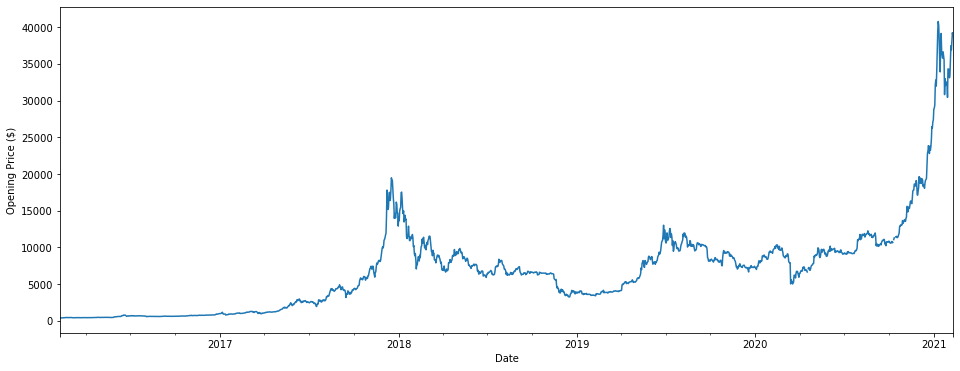

In [52]:
dataset['Open'].plot(figsize=(16,6))
plt.ylabel('Opening Price ($)')
plt.savefig('images/Btc_historical.png')

In [8]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-08,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-09,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-10,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-11,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-12,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-13,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-14,380.814144,387.111716,379.369572,384.875994,384.875994,6.656006e+07
2016-02-15,385.215716,391.469147,382.857426,388.695709,388.695709,7.033140e+07
2016-02-16,389.217002,395.997576,386.933712,393.189854,393.189854,7.287063e+07


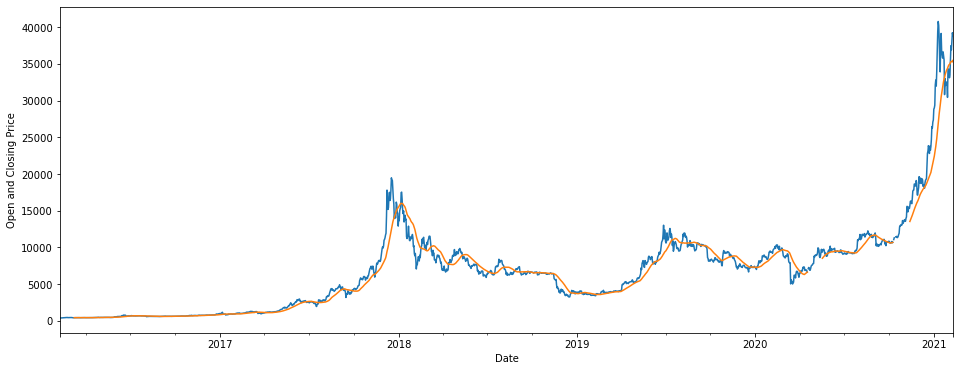

In [51]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()
plt.ylabel('Open and Closing Price')
plt.legend
plt.savefig('images/Opening and Closing Historic graph.png')

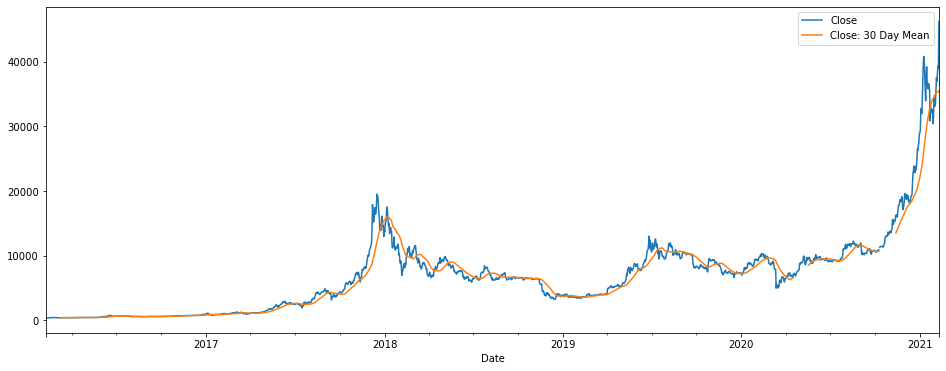

In [10]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

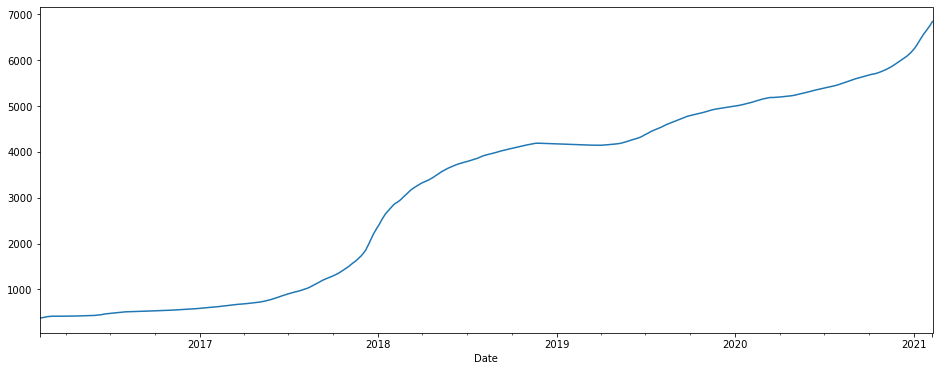

In [11]:
# specify a minimum number of periods
dataset['Open'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [12]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)
training_set.head()

,Open
Date,
2016-02-08,376.756989
2016-02-09,373.423004
2016-02-10,376.145996
2016-02-11,382.114014
2016-02-12,379.686005


In [13]:
training_bitcoin_data = training_set
training_bitcoin_data = training_bitcoin_data.reset_index()
training_bitcoin_data = training_bitcoin_data.rename(columns={'Date':'Date'})
training_bitcoin_data

,Date,Open
0,2016-02-08,376.756989
1,2016-02-09,373.423004
2,2016-02-10,376.145996
3,2016-02-11,382.114014
4,2016-02-12,379.686005
...,...,...
1823,2021-02-04,37475.105469
1824,2021-02-05,36931.546875
1825,2021-02-06,38138.386719
1826,2021-02-07,39250.191406


In [14]:
#training_bitcoin.to_csv('Output/training_bitcoin.csv')

In [15]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
X_train

array([[[8.24933081e-05],
        [0.00000000e+00],
        [6.73754135e-05],
        ...,
        [1.17762558e-03],
        [1.25846144e-03],
        [1.24203194e-03]],

       [[0.00000000e+00],
        [6.73754135e-05],
        [2.15043009e-04],
        ...,
        [1.25846144e-03],
        [1.24203194e-03],
        [1.22439051e-03]],

       [[6.73754135e-05],
        [2.15043009e-04],
        [1.54966405e-04],
        ...,
        [1.24203194e-03],
        [1.22439051e-03],
        [1.17252866e-03]],

       ...,

       [[1.72416282e-01],
        [1.70592670e-01],
        [1.93578095e-01],
        ...,
        [2.72362693e-01],
        [2.44571635e-01],
        [2.60377920e-01]],

       [[1.70592670e-01],
        [1.93578095e-01],
        [1.88160467e-01],
        ...,
        [2.44571635e-01],
        [2.60377920e-01],
        [2.25108051e-01]],

       [[1.93578095e-01],
        [1.88160467e-01],
        [1.87624104e-01],
        ...,
        [2.60377920e-01],
        [2.2510

In [18]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [19]:
# Initialising the RNN
regressor = Sequential()



In [20]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [21]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [22]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



Epoch 1/100
38/38 [==============================] - 14s 132ms/step - loss: 0.0081
Epoch 2/100
38/38 [==============================] - 5s 129ms/step - loss: 8.1501e-04
Epoch 3/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0012
Epoch 4/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0011
Epoch 5/100
38/38 [==============================] - 5s 133ms/step - loss: 6.5117e-04
Epoch 6/100
38/38 [==============================] - 5s 133ms/step - loss: 7.7034e-04
Epoch 7/100
38/38 [==============================] - 5s 131ms/step - loss: 7.6672e-04
Epoch 8/100
38/38 [==============================] - 5s 143ms/step - loss: 6.6140e-04
Epoch 9/100
38/38 [==============================] - 6s 143ms/step - loss: 7.2769e-04
Epoch 10/100
38/38 [==============================] - 5s 142ms/step - loss: 5.5037e-04
Epoch 11/100
38/38 [==============================] - 14s 377ms/step - loss: 5.7826e-04
Epoch 12/100
38/38 [==============================] - 9s 237ms

38/38 [==============================] - 5s 119ms/step - loss: 1.7102e-04
Epoch 96/100
38/38 [==============================] - 4s 109ms/step - loss: 1.9486e-04
Epoch 97/100
38/38 [==============================] - 5s 118ms/step - loss: 2.2565e-04
Epoch 98/100
38/38 [==============================] - 5s 120ms/step - loss: 2.5367e-04
Epoch 99/100
38/38 [==============================] - 6s 157ms/step - loss: 2.0060e-04
Epoch 100/100
38/38 [==============================] - 5s 124ms/step - loss: 2.1773e-04


In [23]:
#from tensorflow import keras
#model = keras.models.load_model('.')

In [25]:
#model_loss, model_accuracy = regressor.evaluate(
  #  X_train, y_train)
#print(f"Normal Neural Network - Loss: {model_loss}")

In [26]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2020-21
dataset_test = pd.read_csv('Resources/BTC-USD-21.csv',index_col="Date",parse_dates=True)

dataset_test.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,48625928883
2021-03-06,48899.230469,49147.218750,47257.527344,48912.382813,48912.382813,34363564661
2021-03-07,48918.679688,51384.367188,48918.679688,51206.691406,51206.691406,43137459378
2021-03-08,51174.117188,52314.070313,49506.054688,52246.523438,52246.523438,48597428048
2021-03-09,52272.968750,54824.117188,51981.832031,54824.117188,54824.117188,50912227385


In [27]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [28]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2021-02-09 to 2021-03-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       29 non-null     float64
 1   High       29 non-null     float64
 2   Low        29 non-null     float64
 3   Close      29 non-null     float64
 4   Adj Close  29 non-null     float64
 5   Volume     29 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.6 KB


In [29]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [30]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 2021-02-09 to 2021-03-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    29 non-null     float64
dtypes: float64(1)
memory usage: 464.0 bytes


In [31]:
test_set.head(10)

,Open
Date,
2021-02-09,46184.992188
2021-02-10,46469.761719
2021-02-11,44898.710938
2021-02-12,47877.035156
2021-02-13,47491.203125
2021-02-14,47114.507813
2021-02-15,48696.535156
2021-02-16,47944.457031
2021-02-17,49207.277344


In [49]:
test_set.to_csv('Actual_BTC_Price.csv', index=True, header=True)

In [32]:
# Getting the predicted stock price of 2021
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 90):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [34]:
#df=pd.merge(dataset_test['Open'], predicted_stock_price, left_index=True, right_index=True)

In [35]:
X_test.shape

(30, 60, 1)

In [36]:
test1=np.expand_dims(X_test[0], axis=0)
test1.shape

(1, 60, 1)

In [39]:
print(f"Predicted : {regressor.predict(test1)}")

Predicted : [[0.79751843]]


In [40]:
#test1

In [41]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price

,0
0,32605.298828
1,41561.808594
2,37446.121094
3,35152.800781
4,40380.925781
5,37692.640625
6,37740.585938
7,40132.265625
8,37748.183594
9,40201.921875


In [47]:
predicted_stock_price.to_csv('pridicted_BTC_Price.csv', index=True,)

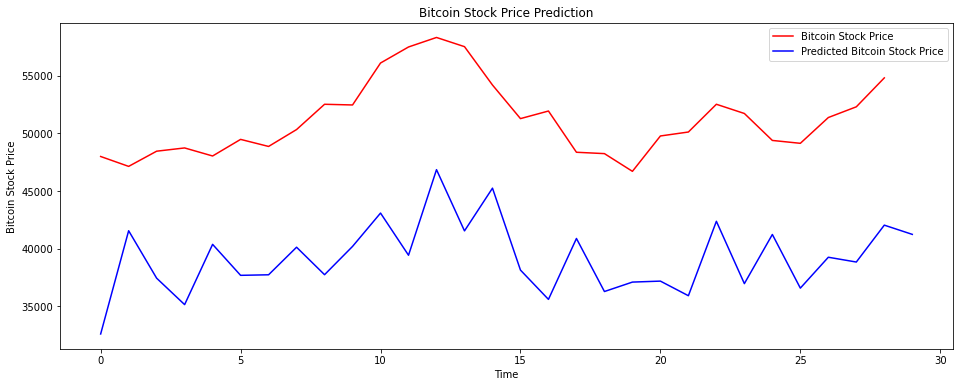

In [50]:

# Visualising the results
fig = plt.figure()

fig.set_size_inches(16, 6)


plt.plot(real_stock_price, color = 'red', label = 'Bitcoin Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Bitcoin Stock Price')
plt.title('Bitcoin Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Stock Price')
plt.legend()
plt.show()

fig.savefig('images/Prediction_Actual_Price.png')



In [43]:
#Establish connection to mongo db
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [44]:
# create a database connection
db = client.BTC_db

In [45]:
#Setup collections, if collections exist drop them start anew, 
db.train_bitcoin_data.drop()

ServerSelectionTimeoutError: localhost:27017: [Errno 61] Connection refused, Timeout: 30s, Topology Description: <TopologyDescription id: 604abf41d42b90767b25d409, topology_type: Single, servers: [<ServerDescription ('localhost', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('localhost:27017: [Errno 61] Connection refused')>]>

In [ ]:
#Convert pandas dataframe to dictionary, orient as a record, keeps a copy
df_dict = train_bitcoin_data.to_dict(orient='records').copy()

In [ ]:
#Insert the dictionary into collection
db.train_bitcoin_data.insert_many(df_dict)